In [10]:
import csv
import os
from datetime import datetime
import math
import matplotlib.pyplot as plt
import numpy as np

In [11]:
options_dir = '../data/options_data'
for ticker in os.listdir(options_dir):
    ticker_dir = options_dir + '/' + ticker
    call_files = []
    put_files = []
    for file in os.listdir(ticker_dir):
        file_heruistics = file.split('_')
        strike = file_heruistics[2].split('-', 1)
        expiry_date = datetime.strptime(file_heruistics[1], '%Y%m%d').date()

        if 'c' in strike[0].replace('.csv', ''):
            call_files.append((file, expiry_date))
        if 'p' in strike[0].replace('.csv', ''):
            put_files.append((file, expiry_date))

    call_files.sort(key=lambda contract: contract[1])
    put_files.sort(key=lambda contract: contract[1])

    #implement synthetic long strategy
    balance = 100000
    
    callContracts = 0
    putContracts = 0
    csv_data = []
    c_csv_data = []
    p_csv_data = []
    smaller = call_files
    
    if(len(call_files) > len(put_files)):
        smaller = put_files
    print('CALL FILES: '+str(len(call_files)) +' PUT FILES: '+ str(len(put_files)))
    for x in range(len(smaller)):

        cfile, c_expiry_date = call_files[x]
        pfile, p_expiry_date = put_files[x]

        with open(os.path.join(ticker_dir, cfile), 'r') as f:
            #CALL LOGIC: BUY AT BEGINNING OF EACH MONTH
            strike_csv = csv.reader(f)
            row = list(strike_csv)

            for index, line in reversed(list(enumerate(row[0:len(row)-1]))):
                date = datetime.strptime(line[0], '%m/%d/%Y').date()
                if date.month == c_expiry_date.month:
                    c_start_open = float(row[index][1])
                    c_strike_price = float(row[index][16])
                    c_start_price = float(row[index][15])
                    c_end_price = float(row[1][15])
                    c_end_last = float(row[1][4])
                    break

            # buy call contracts + subtract balance
            
        
            
        with open(os.path.join(ticker_dir, pfile), 'r') as f:
            #PUT LOGIC: SELL AT BEGINNING OF EACH MONTH
            strike_csv = csv.reader(f)
            row = list(strike_csv)

            for index, line in reversed(list(enumerate(row[0:len(row)-1]))):
                date = datetime.strptime(line[0], '%m/%d/%Y').date()
                if date.month == p_expiry_date.month:
                    p_start_open = float(row[index][1])
                    p_strike_price = float(row[index][16])
                    p_start_price = float(row[index][15])
                    p_end_price = float(row[1][15])
                    p_end_last = float(row[1][4])
                    break

            # sell put contracts + add balance
        callContracts = math.floor((balance*.25)/(c_start_open * 100))
        #balance -= (c_start_open * 100) * callContracts
        putContracts = math.floor((balance*.25)/(p_start_open * 100))
        #balance += (p_start_open * 100) * putContracts

        
        # compare end asset price to strike price
        #Call expires in the money we gain difference between strike and actual price times contracts times 100
        
        callProfits = (callContracts * 100) * (c_end_last - c_start_open)
        putProfits = (putContracts * 100) * (p_end_last - p_start_open)
        totalProfits = callProfits + putProfits
        #Put expires in the money we lose difference between strike and actual price times contracts times 100
        #If put expires ITM we must buy back 100 shares times contracts
        
        balance += totalProfits
            
        total_balance = balance

        # obtain 'results'
        net_percentage = ((total_balance - 100000) / 100000) * 100
        net_return = total_balance - 100000

        csv_data.append([p_expiry_date, date, p_strike_price, p_start_price, p_end_price, c_start_open, putContracts, totalProfits,total_balance, net_percentage, net_return])

    with open('../data/outputs/synthetic_long/' + ticker + '.csv', 'w', newline="") as f:
        writer = csv.writer(f)

        header = ['Expiration Date', 'Date Position Opened', 'Strike Price', 'Starting asset price', 'Ending Asset Price', 'Price Per Contract', 'Contracts', 'Contract Profit/Loss', 'Monthly Ending Balance', 'Percent Change', 'Profit Amount']
        writer.writerow(header)

        for row in csv_data:
            writer.writerow(row)

CALL FILES: 24 PUT FILES: 24
CALL FILES: 24 PUT FILES: 24
CALL FILES: 24 PUT FILES: 24
CALL FILES: 24 PUT FILES: 24


AMD.csv
data points: 24
x-axis values: ['11/2019', '12/2019', '1/2020', '2/2020', '3/2020', '4/2020', '5/2020', '6/2020', '7/2020', '8/2020', '9/2020', '10/2020', '11/2020', '12/2020', '1/2021', '2/2021', '3/2021', '4/2021', '5/2021', '6/2021', '7/2021', '8/2021', '9/2021', '10/2021']
y-axis values: [168952.0, 327712.0, 300848.0, 312748.0, 259240.0, 331810.0, 330705.0, 365940.0, 1157955.0, 1346307.0, 1886388.0, 2112306.0, 3000306.0, 2490738.0, 2505558.0, 2294418.0, 2874543.0, 2415828.0, 1825809.0, 2175179.0, 3007569.0, 3258129.0, 3396129.0, 5384180.0]
y2-axis vals: [113907.48, 133430.32, 136747.16, 132324.7, 132324.7, 152429.44, 156531.86, 153069.54, 225283.68, 264242.07, 238551.06, 219057.32, 269595.58, 266831.54, 249170.79, 245883.04, 228396.86, 237474.54, 232993.89, 273290.66, 308961.3, 322141.4, 299389.0, 349810.88]


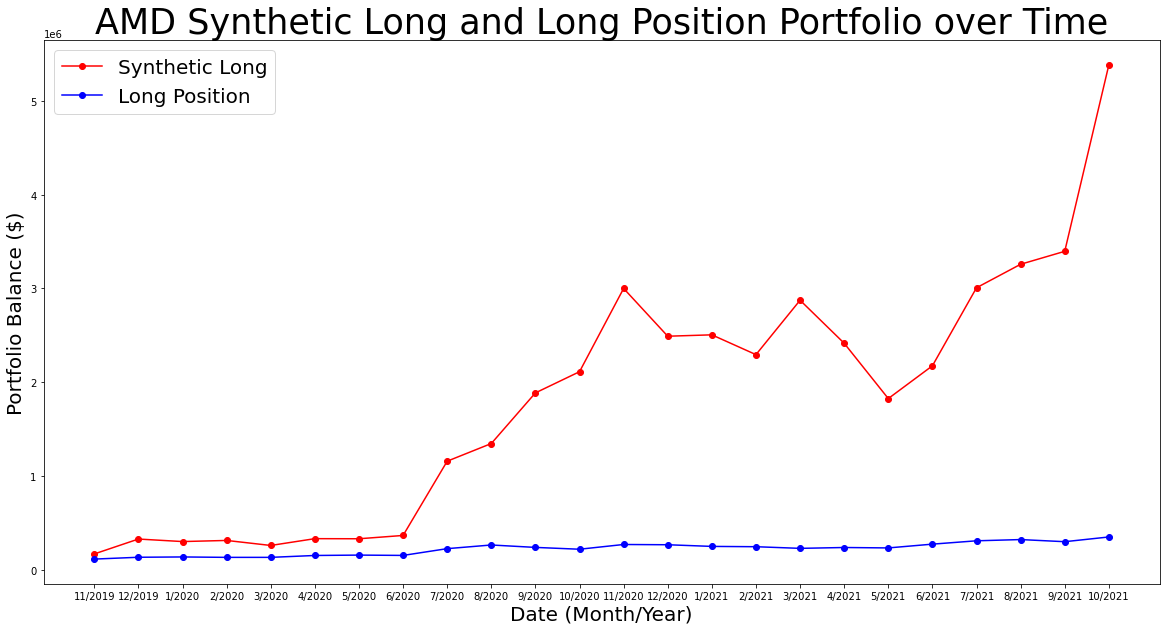

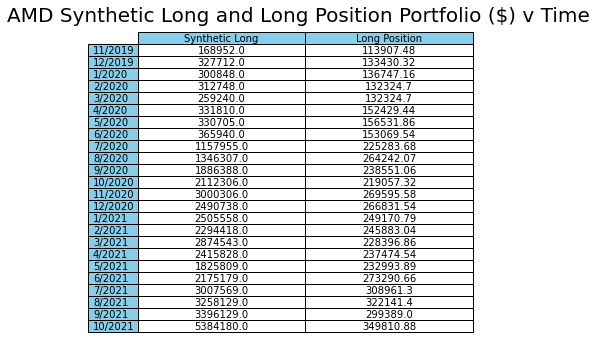

F.csv
data points: 24
x-axis values: ['11/2019', '12/2019', '1/2020', '2/2020', '3/2020', '4/2020', '5/2020', '6/2020', '7/2020', '8/2020', '9/2020', '10/2020', '11/2020', '12/2020', '1/2021', '2/2021', '3/2021', '4/2021', '5/2021', '6/2021', '7/2021', '8/2021', '9/2021', '10/2021']
y-axis values: [77950.0, 100075.0, 85203.0, 130195.0, 354133.0, 296867.0, 251817.0, 297577.0, 307783.0, 269319.0, 319399.0, 527433.0, 697620.0, 558100.0, 1181267.0, 1274063.0, 1555529.0, 1320889.0, 2442023.0, 2163920.0, 2919407.0, 4506007.0, 5357129.0, 8999165.0]
y2-axis vals: [104861.11, 107638.89, 102083.33, 80555.56, 55902.78, 58912.04, 66087.96, 70370.37, 76504.63, 78935.19, 77083.33, 89467.59, 105092.59, 101736.11, 121875.0, 135416.67, 141782.41, 133564.81, 168171.3, 171990.74, 161458.33, 150810.19, 163888.89, 197685.19]


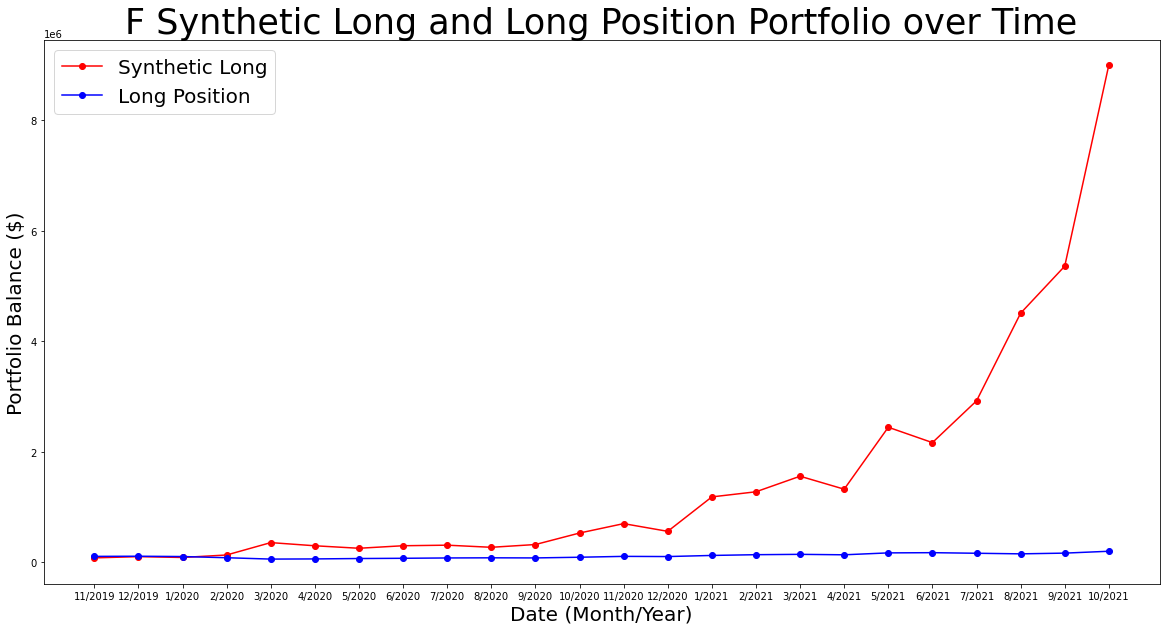

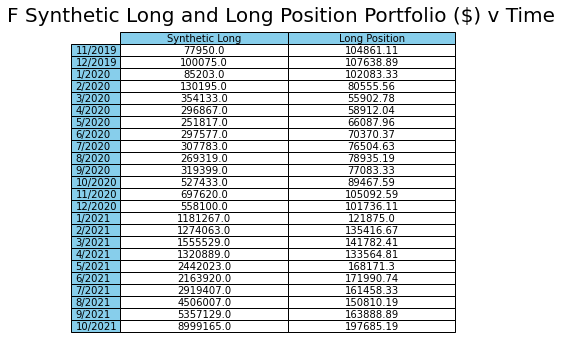

GM.csv
data points: 24
x-axis values: ['11/2019', '12/2019', '1/2020', '2/2020', '3/2020', '4/2020', '5/2020', '6/2020', '7/2020', '8/2020', '9/2020', '10/2020', '11/2020', '12/2020', '1/2021', '2/2021', '3/2021', '4/2021', '5/2021', '6/2021', '7/2021', '8/2021', '9/2021', '10/2021']
y-axis values: [81130.0, 109780.0, 129940.0, 129940.0, 367540.0, 443949.0, 383633.0, 332043.0, 256716.0, 409732.0, 478214.0, 724627.0, 1313581.0, 1722723.0, 2476043.0, 1971721.0, 3415949.0, 2868661.0, 2482080.0, 2317390.0, 3353135.0, 7282310.0, 8993910.0, 11667048.0]
y2-axis vals: [96748.19, 98360.66, 89733.94, 81967.21, 55845.2, 59903.25, 69551.2, 67992.48, 66890.62, 79629.13, 79521.63, 92797.64, 117817.79, 111905.4, 136199.95, 137946.79, 154420.85, 153775.87, 159392.64, 159016.39, 152754.64, 131711.91, 141655.47, 146277.88]


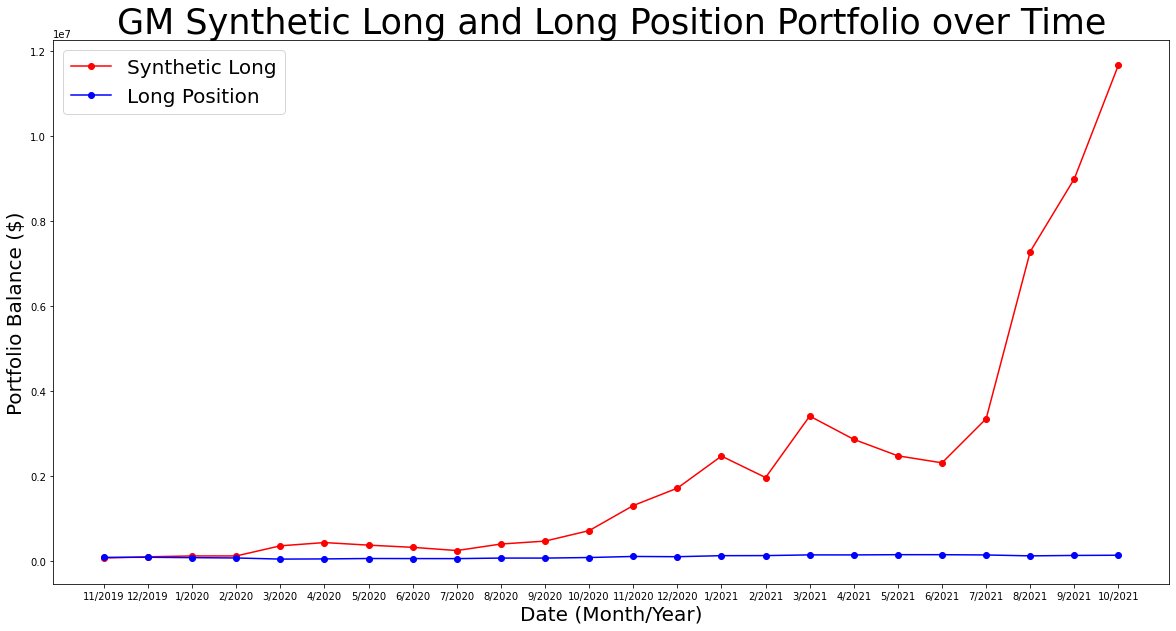

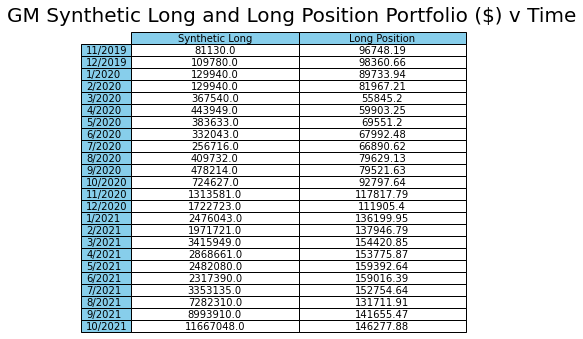

MSFT.csv
data points: 24
x-axis values: ['11/2019', '12/2019', '1/2020', '2/2020', '3/2020', '4/2020', '5/2020', '6/2020', '7/2020', '8/2020', '9/2020', '10/2020', '11/2020', '12/2020', '1/2021', '2/2021', '3/2021', '4/2021', '5/2021', '6/2021', '7/2021', '8/2021', '9/2021', '10/2021']
y-axis values: [133500.0, 178090.0, 237385.0, 289185.0, 321053.0, 487033.0, 538693.0, 797093.0, 703373.0, 1080598.0, 1340858.0, 1394590.0, 1516010.0, 1670346.0, 2306849.0, 2277729.0, 1840157.0, 2186783.0, 1677767.0, 2432147.0, 3199057.0, 4810357.0, 3816973.0, 10352377.0]
y2-axis vals: [104935.53, 109316.51, 118002.22, 112304.17, 109323.44, 124227.09, 127027.59, 141071.68, 142111.47, 156335.78, 145799.25, 140350.76, 148391.79, 154179.95, 160793.01, 161084.15, 163434.08, 174809.37, 173076.39, 187785.94, 197497.57, 209261.06, 195424.93, 229876.61]


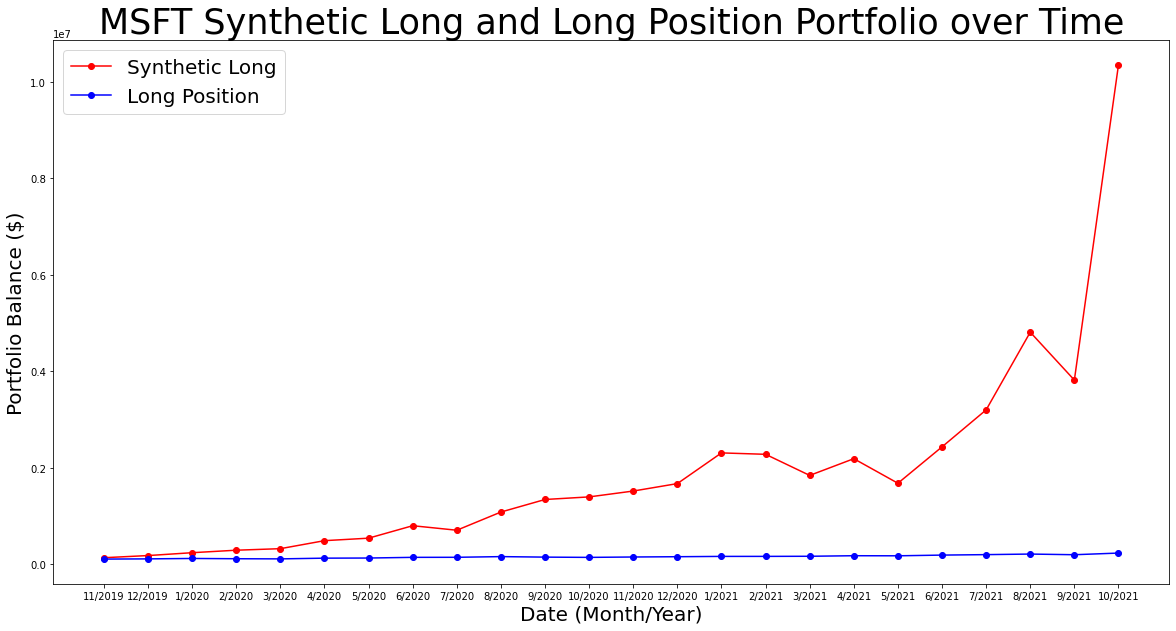

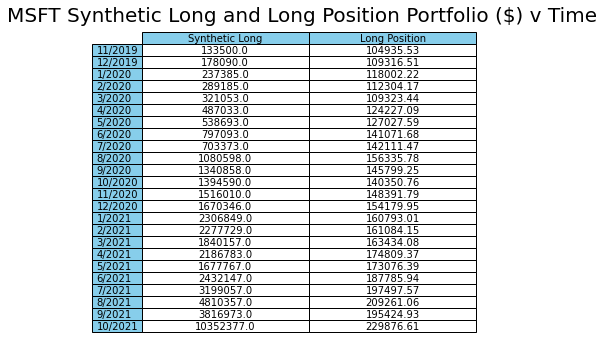

In [12]:
# graph results using matlab pyplot

outputs = '../data/outputs/synthetic_long/'
historical_outputs = '../data/outputs/historical_returns/'
files = [f for f in os.listdir(outputs) if os.path.isfile(os.path.join(outputs, f))]

for file in files:
    with open(os.path.join(outputs, file), 'r') as f:
        output_csv = csv.reader(f)
        rows = list(output_csv)
        
        profits = []
        monthly_balance = []
        months = []
        long_monthly_bal = []

        for line in rows[1:]:
            profits.append(round(float(line[10]), 2))
            monthly_balance.append(round(float(line[8]),2))
            date = datetime.strptime(line[0], "%Y-%m-%d").date()
            months.append(str(date.month) + '/' + str(date.year))

    with open(os.path.join(historical_outputs, file), 'r') as f:
        output_csv = csv.reader(f)
        rows = list(output_csv)
        for line in rows[1:]:
            long_monthly_bal.append(float(line[5]))
    long_monthly_bal.reverse()
    
    
    print(file)
    print("data points: " + str(len(monthly_balance)))
    print('x-axis values: ' + str(months))
    print('y-axis values: ' + str(monthly_balance))
    print('y2-axis vals: ' + str(long_monthly_bal))
    
    x1 = months
    y1 = monthly_balance
    y2 = long_monthly_bal
    

    plt.figure(figsize=(20,10))
    plt.rcParams['font.size'] = '10'
    plt.plot(x1, y1, color='red', marker='o', label="Synthetic Long")
    plt.plot(x1, y2, color='blue', marker='o', label='Long Position')
    plt.xlabel("Date (Month/Year)", fontsize=20)
    plt.ylabel("Portfolio Balance ($)", fontsize=20)
    
    plt.title(file.replace('.csv', '') + ' Synthetic Long and Long Position Portfolio over Time', fontsize=35)
    plt.legend(fontsize=20)

    plt.savefig('../data/outputs/synthetic_long/graphs/' + file.replace('.csv', '') + '_balance_v_time.jpg')
    plt.show()

    columns = ('Synthetic Long', 'Long Position')
    rows = ['%s' % x for x in months]
    nparr1 = np.array(monthly_balance)
    nparr2 = np.array(long_monthly_bal)

    np2d = np.vstack((nparr1, nparr2)).T
    
    fig, ax = plt.subplots() 
    ax.set_axis_off() 
    table = ax.table( 
        cellText = np2d,  
        rowLabels = rows,  
        colLabels = columns, 
        rowColours =["skyblue"] * 24,  
        colColours =["skyblue"] * 24, 
        cellLoc ='center',  
        loc ='upper left')         
    
    ax.set_title(file.replace('.csv', '') + ' Synthetic Long and Long Position Portfolio ($) v Time',
                fontsize=20)

    plt.savefig('../data/outputs/synthetic_long/graphs/' + file.replace('.csv', '') + '_data_table.jpg',
                bbox_inches='tight', dpi=150)
    plt.show()
        
